**ASSIGNMENT 2**

**Penguin Classification Analysis**

<!-- Problem Statement:

The Penguin Classification Analysis problem involves predicting the species of a penguin
based on various physical characteristics. The dataset includes information about the body
mass, culmen length, culmen depth, flipper length, and sex of different penguin species.
The problem is typically approached as a classification problem, where the target variable is
the penguin species, and the features are the physical characteristics of the penguins.
Accurate classification of penguin species can also help researchers understand the effects of
climate change and other environmental factors on penguin populations. The problem can
also be useful for conservation efforts, as it can help identify and protect endangered penguin
species

Attribute Information:

*   Species: penguin species (Chinstrap, Adélie, or Gentoo)

*   Island: island name (Dream, Torgersen, or Biscoe) in Antarctica
*   culmen_length_mm: culmen length (mm)

*  culmen_depth_mm: culmen depth (mm)
* flipper_length_mm: flipper length (mm)
* body_mass_g: body mass (g)
* Sex: penguin sex

 -->






1. Download the dataset: [Dataset](https://colab.research.google.com/corgiredirector?site=https%3A%2F%2Fdrive.google.com%2Ffile%2Fd%2F1d_M-U9FBxXHER_oY7pFEkG8eWz8kJwFL%2Fview)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Load the dataset into the tool.

In [3]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ SmartInternz/penguins_size.csv")

In [5]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


3. Perform Below Visualizations.


* Univariate Analysis

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

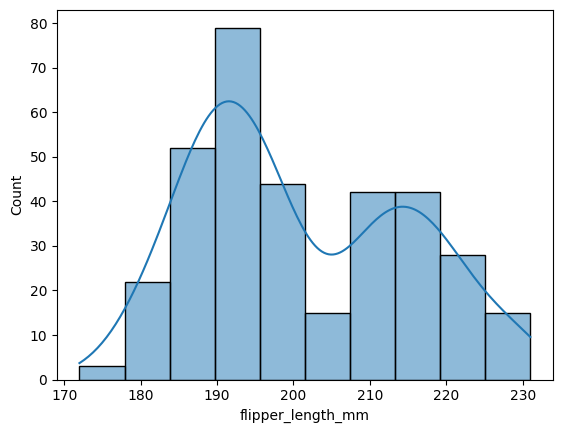

In [6]:
sns.histplot(data['flipper_length_mm'], kde=True)

In [7]:
data.species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7d19b9e0ec50>,
 [Text(0.19980052901159365, 1.0817022458175296, 'Adelie'),
  Text(-0.7918938277833127, -0.7634816078457249, 'Gentoo'),
  Text(0.894618705053837, -0.6400448207491378, 'Chinstrap')],
 [Text(0.10898210673359653, 0.5900194068095616, '44.19%'),
  Text(-0.4319420878818069, -0.4164445133703954, '36.05%'),
  Text(0.4879738391202747, -0.34911535677225697, '19.77%')])

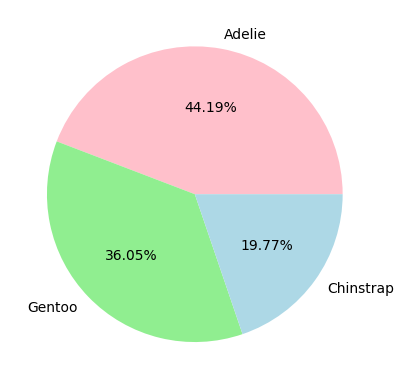

In [8]:
plt.pie(data.species.value_counts(),colors=['pink','lightgreen','lightblue'],labels=["Adelie","Gentoo","Chinstrap"],autopct="%.2f%%")

* Bi- Variate Analysis

<ipython-input-9-d9e8df174f92>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='island',y='flipper_length_mm',data=data,palette='rainbow')


<Axes: xlabel='island', ylabel='flipper_length_mm'>

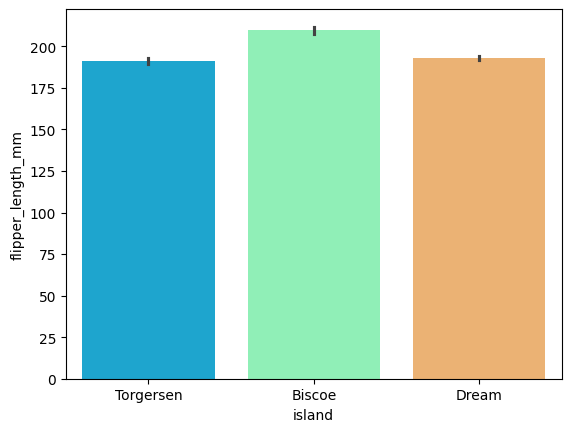

In [9]:
sns.barplot(x='island',y='flipper_length_mm',data=data,palette='rainbow')

* Multi-Variate Analysis

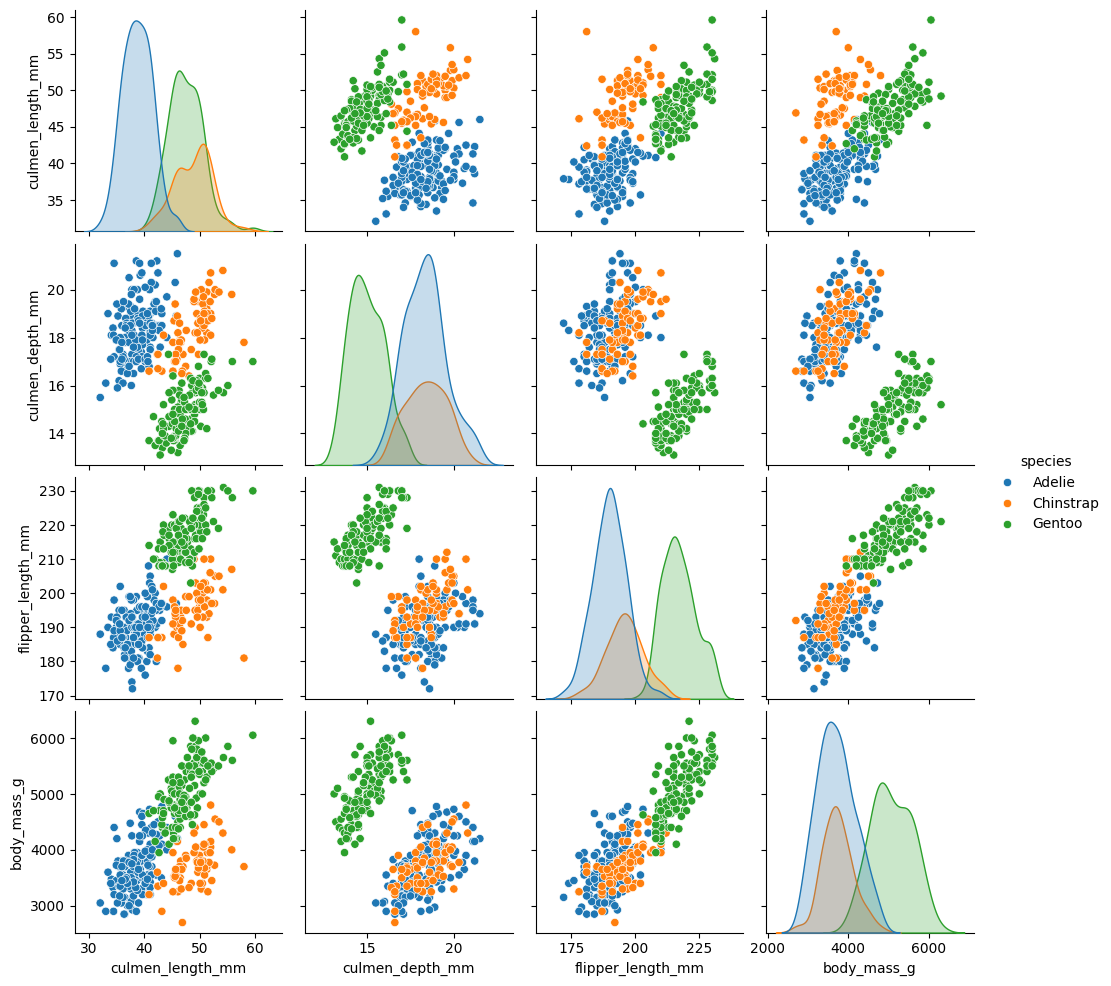

In [10]:
# Pairplot to visualize relationships between variables
sns.pairplot(data, hue='species')

4. Perform descriptive statistics on the dataset.

In [11]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


5. Check for Missing values and deal with them.

In [13]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [14]:
# Replacing all the numeric/float Null value with mean
data.fillna(data.mean(numeric_only=True).round(1), inplace=True)

In [15]:
# Replacing all the string/object Null value with Mode
data['sex'].fillna(data['sex'].mode()[0], inplace=True)

In [16]:
data.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

6. Find the outliers and replace them outliers

([0, 1, 2, 3],
 [Text(0, 0, 'culmen_length_mm'),
  Text(1, 0, 'culmen_depth_mm'),
  Text(2, 0, 'flipper_length_mm'),
  Text(3, 0, 'body_mass_g')])

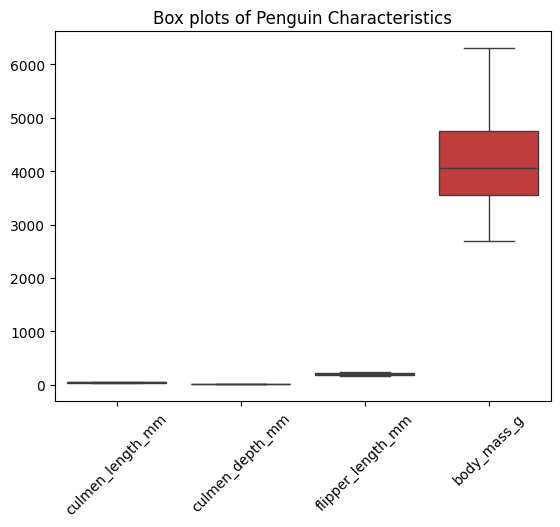

In [17]:
sns.boxplot(data=data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']])
plt.title('Box plots of Penguin Characteristics')
plt.xticks(rotation=45)

7. Check for Categorical columns and perform encoding.

In [18]:
print("Sex",data['sex'].unique(),"\n Island",data['island'].unique(),"\n Species",data['species'].unique())

Sex ['MALE' 'FEMALE' '.'] 
 Island ['Torgersen' 'Biscoe' 'Dream'] 
 Species ['Adelie' 'Chinstrap' 'Gentoo']


In [19]:
m=data['sex'].mode()[0]
data['sex'].replace({'.': m},inplace=True)
data['sex'].replace({'MALE': 0, 'FEMALE':1},inplace=True)
data['island'].replace({'Torgersen': 0, 'Biscoe': 1, 'Dream':2},inplace=True)
data['species'].replace({'Adelie':0, 'Chinstrap' :1, 'Gentoo':2},inplace=True)

In [20]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,0
1,0,0,39.5,17.4,186.0,3800.0,1
2,0,0,40.3,18.0,195.0,3250.0,1
3,0,0,43.9,17.2,200.9,4201.8,0
4,0,0,36.7,19.3,193.0,3450.0,1


9. Split the data into dependent and independent variables.


In [21]:
data.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [22]:
x=data.drop('species',axis=1)
y=data['species']

10. Scaling the data

In [23]:
names=x.columns
names

Index(['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [25]:
x

array([[-1.76805304, -0.88705773,  0.78759672, -1.4224815 , -0.56578954,
        -0.96009776],
       [-1.76805304, -0.8134705 ,  0.12641171, -1.06534537, -0.50316821,
         1.0415606 ],
       [-1.76805304, -0.66629603,  0.43157402, -0.42250034, -1.19200284,
         1.0415606 ],
       ...,
       [-0.30600918,  1.1917816 , -0.73821483,  1.50603474,  1.93906366,
        -0.96009776],
       [-0.30600918,  0.23514758, -1.1959583 ,  0.79176249,  1.25022903,
         1.0415606 ],
       [-0.30600918,  1.09979756, -0.53477329,  0.86318971,  1.50071435,
        -0.96009776]])

In [26]:
x=pd.DataFrame(x,columns=names)
x

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-1.768053,-0.887058,0.787597,-1.422481,-0.565790,-0.960098
1,-1.768053,-0.813470,0.126412,-1.065345,-0.503168,1.041561
2,-1.768053,-0.666296,0.431574,-0.422500,-1.192003,1.041561
3,-1.768053,-0.004011,0.024691,-0.001080,0.000057,-0.960098
4,-1.768053,-1.328581,1.092759,-0.565355,-0.941518,1.041561
...,...,...,...,...,...,...
339,-0.306009,-0.004011,0.024691,-0.001080,0.000057,-0.960098
340,-0.306009,0.529497,-1.450260,1.006044,0.811880,1.041561
341,-0.306009,1.191782,-0.738215,1.506035,1.939064,-0.960098
342,-0.306009,0.235148,-1.195958,0.791762,1.250229,1.041561


11. Split the data into training and testing

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

12. Build the Model

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

In [36]:
model1=LogisticRegression()
model2=DecisionTreeClassifier()
model3 = GaussianNB()

In [37]:
model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

GaussianNB()

In [38]:
pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)

In [32]:
from sklearn.metrics import r2_score

In [44]:
acc1=r2_score(pred1,y_test)*100
acc2=accuracy_score(pred2,y_test)*100
acc3=accuracy_score(pred3,y_test)*100

In [45]:
print("LogisticRegression Accuracy: ", acc1,"\n","DecisionTreeClassifier:",acc2,"\n", "Gaussian Naive Bayes" , acc3)

LogisticRegression Accuracy:  100.0 
 DecisionTreeClassifier: 98.55072463768117 
 Gaussian Naive Bayes 85.5072463768116
